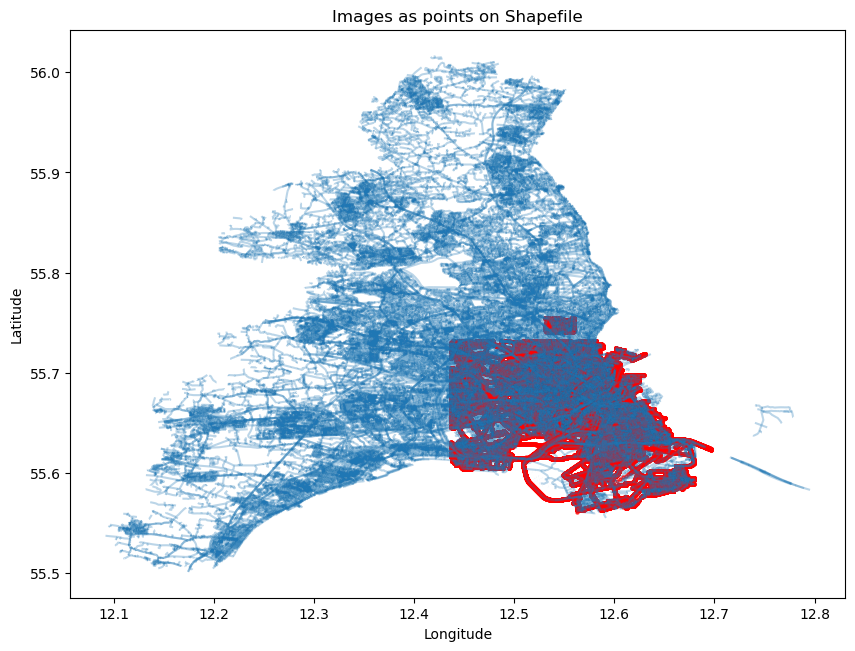

In [2]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt
import os

# Read the CSV file into a pandas DataFrame
data1 = pd.read_csv('image_location_glostrup.csv')
data2 = pd.read_csv('image_locations_kbh+amager.csv')

# Convert the geometry strings to Point objects
geometry1 = [Point(xy) for xy in zip(data1['lng'], data1['lat'])]
geometry2 = [Point(xy) for xy in zip(data2['lng'], data2['lat'])]

# Convert the DataFrame to a GeoDataFrame
gdf1 = gpd.GeoDataFrame(data1, geometry=geometry1)
gdf2 = gpd.GeoDataFrame(data2, geometry=geometry2)

# Check if the image file exists for each image ID
#gdf1['image_exists'] = gdf1['image_id'].apply(lambda x: os.path.isfile(f'billeder/{x}.jpg'))
#gdf2['image_exists'] = gdf2['image_id'].apply(lambda x: os.path.isfile(f'billeder/{x}.jpg'))

# Filter the GeoDataFrame to include only rows where the image exists
#gdf1_filtered = gdf1[gdf1['image_exists']]
#gdf2_filtered = gdf2[gdf2['image_exists']]
# Read the shapefile into a GeoDataFrame
shapefile = gpd.read_file('7f42d69dd7bd00b04081b9cbd0d05ab4e5f87353dcd7364c34b8e7c74d42109d-1676891223740.shp')

# Plot the shapefile with adjusted transparency (alpha value)
ax = shapefile.plot(figsize=(10, 10), alpha=0.3)

# Plot the filtered points on top of the shapefile
gdf1.plot(ax=ax, color='red', markersize=5, alpha=0.7)
gdf2.plot(ax=ax, color='red', markersize=5, alpha=0.7)

# Customize the plot as needed
plt.title('Images as points on Shapefile')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

# Display the plot
plt.show()





In [7]:
import os
import os.path
import datetime

folder_path = "billeder/"  # Replace "billeder/" with your folder path

# Get a list of all files in the folder
files = os.listdir(folder_path)

# Filter out directories and keep only files
files = [file for file in files if os.path.isfile(os.path.join(folder_path, file))]

# Sort the files by modification time in descending order
files.sort(key=lambda x: os.path.getmtime(os.path.join(folder_path, x)), reverse=True)

# Get the last modified file
last_downloaded_file = files[0]

# Get the full path of the last downloaded file
last_downloaded_file_path = os.path.join(folder_path, last_downloaded_file)

# Print the last downloaded file and its full path
print("Last downloaded file:", last_downloaded_file)
print("File path:", last_downloaded_file_path)


Last downloaded file: 473284507231479.jpg
File path: billeder/473284507231479.jpg
